# Tree Methods

## Imported Libraries

In [35]:
import pandas as pd
import numpy as np
import math
import matplotlib

## Data Extraction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121BD5B0>,
      dtype=object)

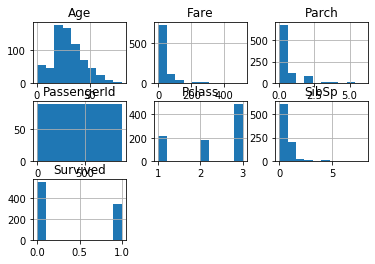

In [44]:
trainingData = pd.read_csv("../Data/train.csv")
trainingData.hist(bins = 10)

## Binning Analog Data

In [43]:
AgeBins = pd.IntervalIndex.from_tuples([(0,15),(15,30),(30,45),(45,60),(60,75),(75,90),(90,105),(105,120)])
TicketBins = pd.IntervalIndex.from_tuples([(0,50000), (50000,100000), (100000,150000),(150000,200000),(200000, 250000), (250000, 300000), (300000, 350000)])
CostBins = pd.IntervalIndex.from_tuples([(-1, 50),(50,100), (100,150), (150, 200), (200, 250), (250, 300), (300,350), (350,400), (400, 450), (450, 500), (500, 550)])

trainingData["AgeGroup"] = pd.cut(trainingData['Age'], bins=AgeBins).cat.add_categories(pd.Interval(-2,-1)).fillna(pd.Interval(-2,-1))
trainingData['TicketGroup'] = pd.cut(pd.to_numeric(trainingData['Ticket'], errors="coerce"), bins=TicketBins).cat.add_categories(pd.Interval(-2,-1)).fillna(pd.Interval(-2,-1))
trainingData['CostGroup'] = pd.cut(trainingData['Fare'], bins=CostBins).cat.add_categories(pd.Interval(-2,-1)).fillna(pd.Interval(-2,-1))

## Tree Data Structure

In [4]:
class Tree:
    
    def __init__(self, feature, children):
        self.feature = feature
        self.children = children
        
    def getFeature(self):
        return self.feature
    
    def search(self,datapoint):
        if self.children is None:
            return self.getFeature()
        point = datapoint.get(self.feature)
        for child in self.children:
            if child[0] == point:
                return child[1].search(datapoint)
        

## Tree Structure Test

In [5]:
leaf1 = Tree(0, None)
leaf2 = Tree(1, None)
leaf3 = Tree(1, None)

branch = Tree("test2", [["b1",leaf1], ["b2",leaf2]])
root = Tree("test1", [["a1",branch], ["a2",leaf3]])

EXdata = pd.Series(data=["a1","b1"],index=["test1","test2"])

assert 0 == root.search(EXdata)

## Information Gain Functions

In [6]:
def Entropy(dataSet):
    result1 = dataSet[dataSet['Survived'] == 1].size/dataSet.size
    if result1 == 0 or result1 == 1:
        return 0
    result1 = result1*np.log2(result1)
    result2 = dataSet[dataSet['Survived'] == 0].size/dataSet.size
    result2 =  result2*np.log2(result2)
    return -1* (result1 + result2)

In [31]:
def InformationGain(dataSet, feature):
    
    totalE = Entropy(dataSet)
    sumE = 0
    
    values, counts = np.unique(dataSet[feature], return_counts = True)
    for val in values:
        sumE += (dataSet[dataSet[feature] == val].size)/dataSet.size*Entropy(dataSet[dataSet[feature] == val])
    return totalE - sumE
        
        

print(InformationGain(trainingData, "CostGroup"))

0.06112152898423162
